In [1]:
import csv
import random

# Define the number of rows
num_rows = 10000

# CSV file name
csv_filename = 'spacecraft_thermal_data.csv'

# Define time interval in seconds
time_interval = 10

# Open a new CSV file to write the data
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Time (s)", "Qgen (W)", "Qsolar (W)", "Qalbedo (W)", "Qplanetshine (W)", "Qout/rad (W)", "Qstored (W)"])

    # Initialize time
    time = 0

    # Generate synthetic data rows
    for _ in range(num_rows):
        # Generate random values for Qgen, Qsolar, Qalbedo, and Qplanetshine within a reasonable range
        Qgen = random.uniform(10, 20)  # Heat generated by the spacecraft (W)
        Qsolar = random.uniform(50, 70)  # Solar heating (W)
        Qalbedo = random.uniform(15, 30)  # Solar heating reflected by planet (W)
        Qplanetshine = random.uniform(10, 25)  # Infrared heating from the planet (W)

        # Calculate Qout/rad and Qstored based on the equation
        total_incoming_heat = Qsolar + Qalbedo + Qplanetshine + Qgen
        Qout_rad = random.uniform(60, 100)  # Emit some energy to space
        Qstored = total_incoming_heat - Qout_rad  # Remaining heat stored in spacecraft

        # Write a row to the CSV file
        writer.writerow([time, round(Qgen, 2), round(Qsolar, 2), round(Qalbedo, 2), round(Qplanetshine, 2), round(Qout_rad, 2), round(Qstored, 2)])

        # Increment time
        time += time_interval

print(f"Data generation complete. The file '{csv_filename}' has been created with {num_rows} rows.")


Data generation complete. The file 'spacecraft_thermal_data.csv' has been created with 10000 rows.


First few rows of the data:
   Time (s)  Qgen (W)  Qsolar (W)  Qalbedo (W)  Qplanetshine (W)  \
0         0     15.93       54.29        18.90             10.57   
1        10     12.48       67.27        17.54             12.49   
2        20     17.10       65.71        23.52             23.23   
3        30     14.48       66.78        29.52             20.14   
4        40     13.93       57.92        23.22             16.31   

   Qout/rad (W)  Qstored (W)  
0         74.66        25.02  
1         71.98        37.80  
2         61.96        67.60  
3         93.24        37.68  
4         73.97        37.41  

Missing values per column:
Time (s)            0
Qgen (W)            0
Qsolar (W)          0
Qalbedo (W)         0
Qplanetshine (W)    0
Qout/rad (W)        0
Qstored (W)         0
dtype: int64

Descriptive statistics:
           Time (s)      Qgen (W)    Qsolar (W)  Qalbedo (W)  \
count  10000.000000  10000.000000  10000.000000  10000.00000   
mean   49995.000000     15.02

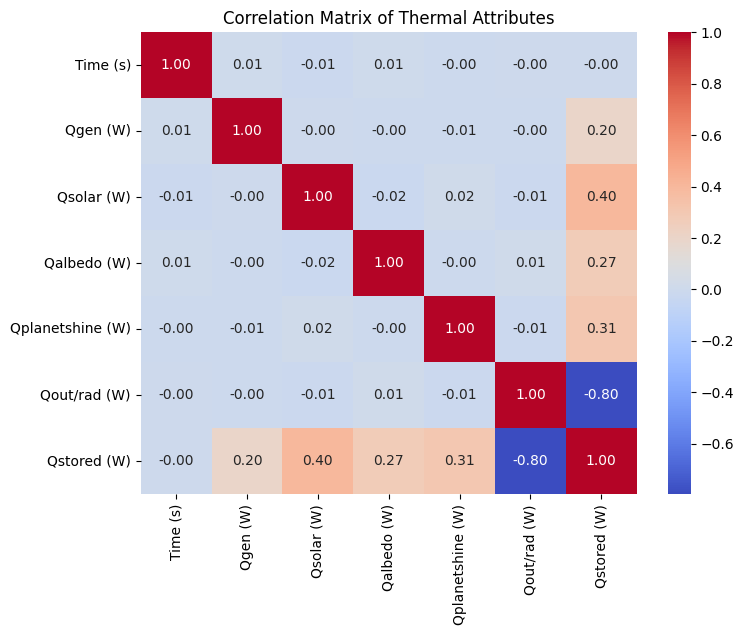


Data with new features (rate of change):
   Time (s)  Qgen (W)  Qsolar (W)  Qalbedo (W)  Qplanetshine (W)  \
0         0     15.93       54.29        18.90             10.57   
1        10     12.48       67.27        17.54             12.49   
2        20     17.10       65.71        23.52             23.23   
3        30     14.48       66.78        29.52             20.14   
4        40     13.93       57.92        23.22             16.31   

   Qout/rad (W)  Qstored (W)  dQgen  dQsolar  dQout/rad  
0         74.66        25.02    NaN      NaN        NaN  
1         71.98        37.80  -3.45    12.98      -2.68  
2         61.96        67.60   4.62    -1.56     -10.02  
3         93.24        37.68  -2.62     1.07      31.28  
4         73.97        37.41  -0.55    -8.86     -19.27  

Train and Test Split Shapes:
X_train: (8000, 7), X_test: (2000, 7)
y_train: (8000,), y_test: (2000,)


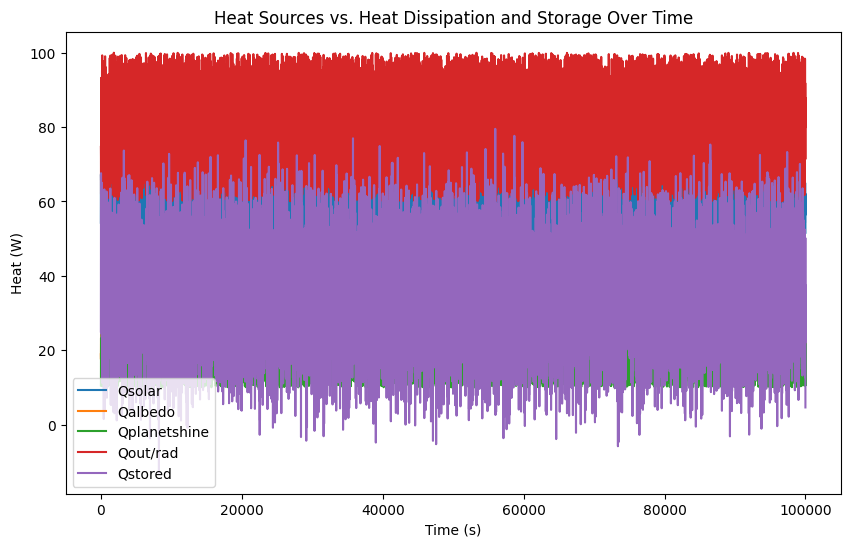

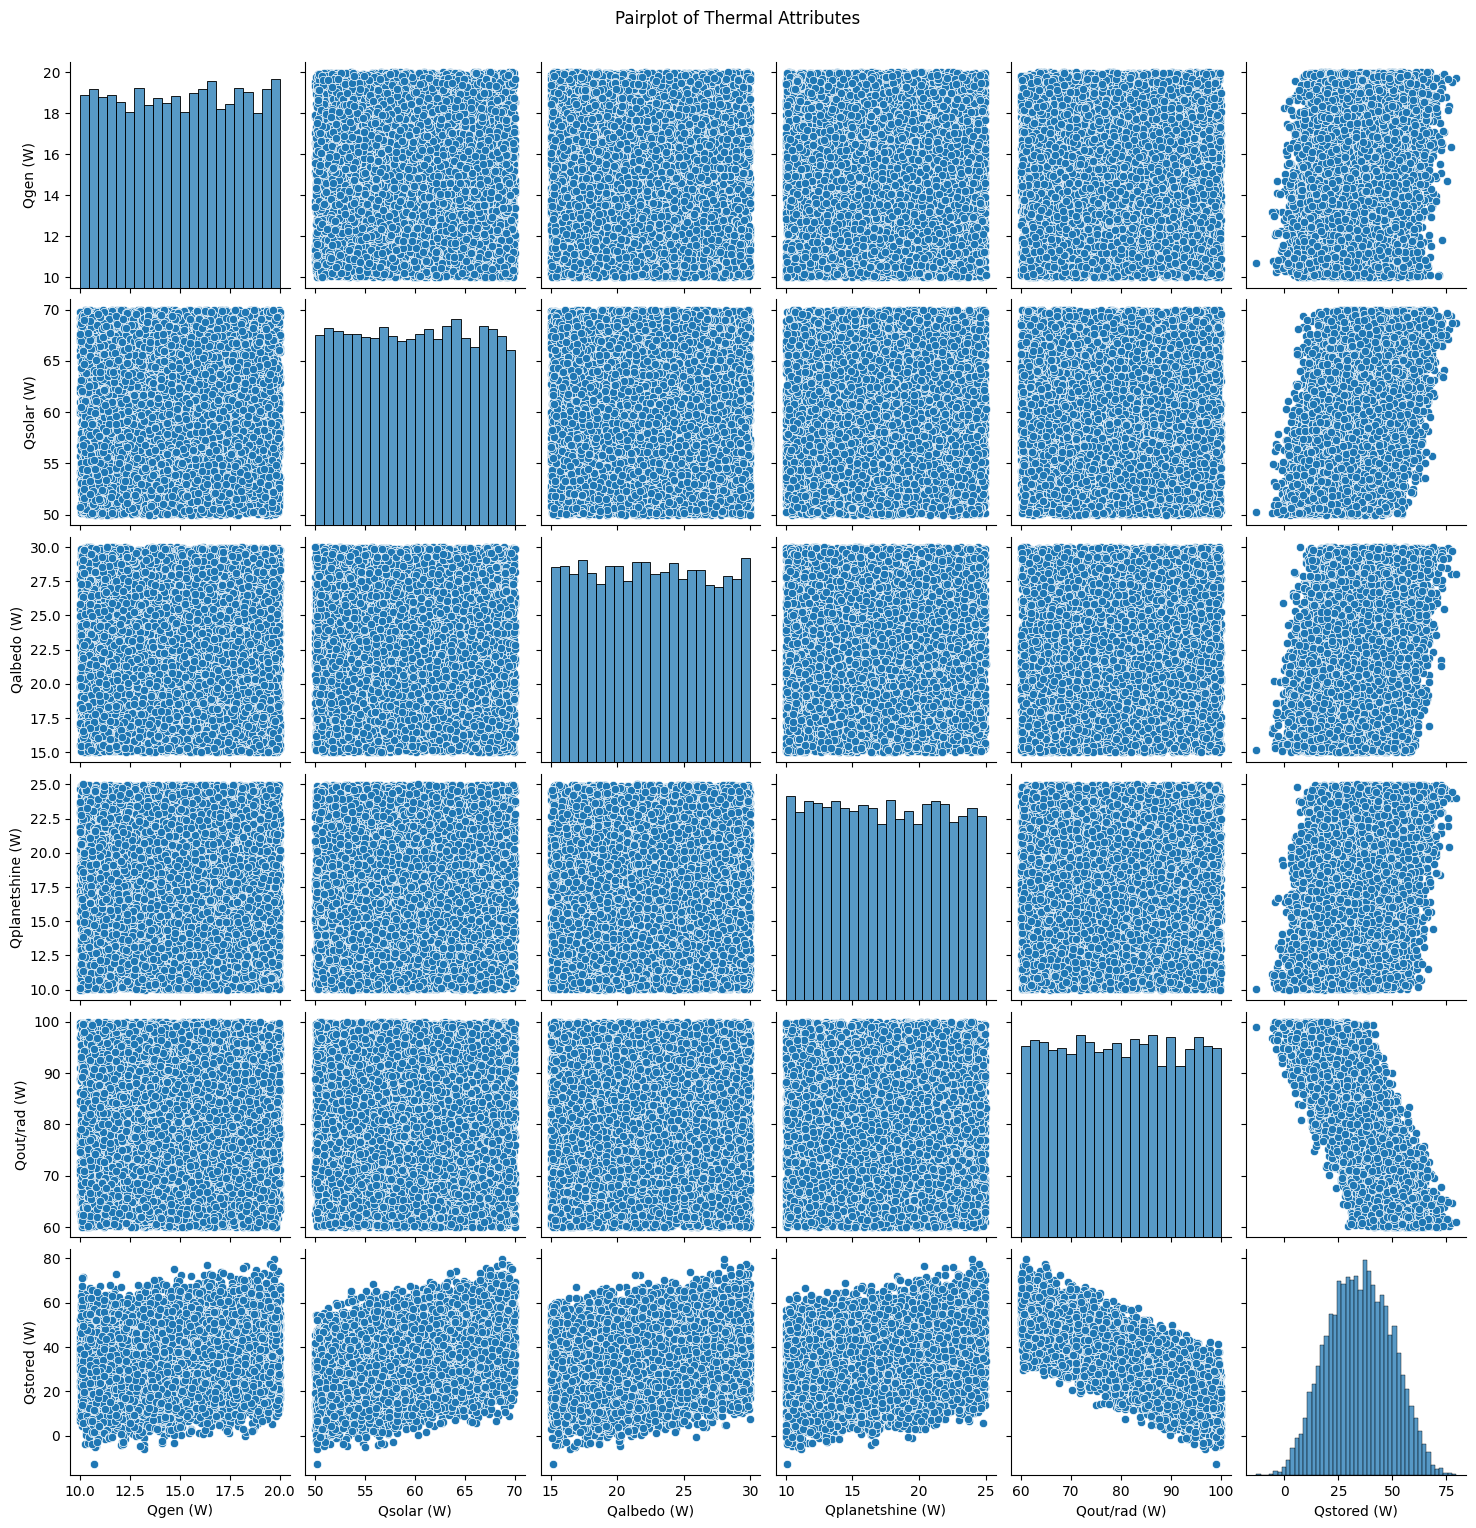

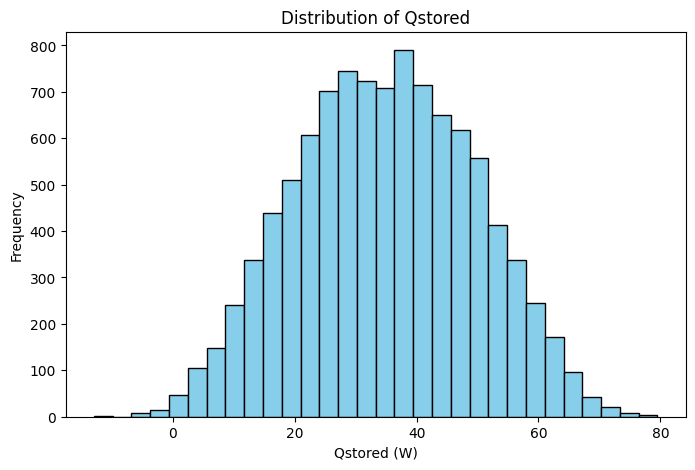

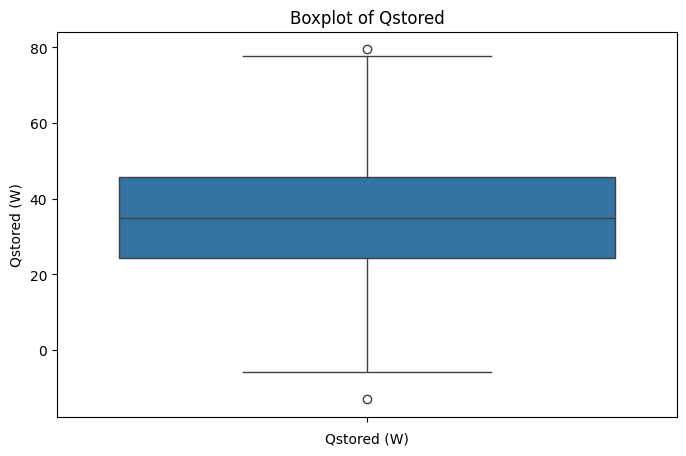

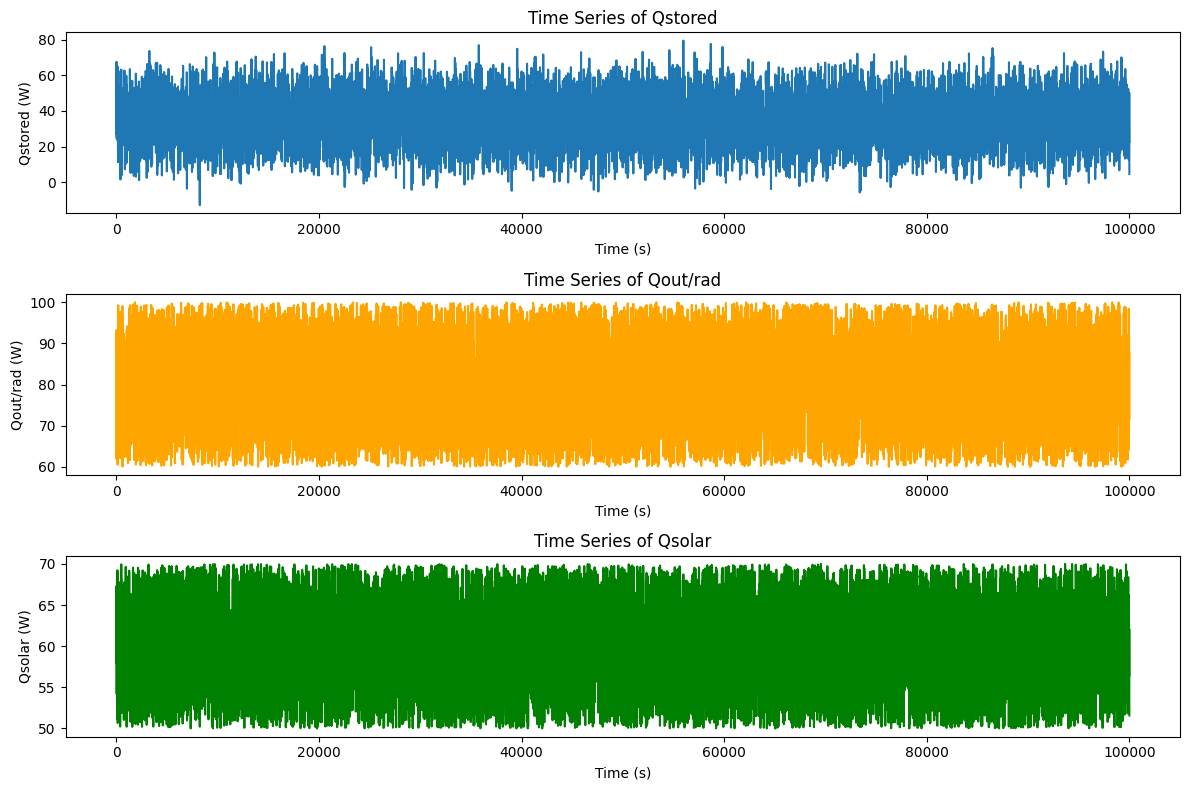

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('spacecraft_thermal_data.csv')

# Display the first few rows of the dataset
print("First few rows of the data:")
print(data.head())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Fill or handle missing values if any
# In this case, we're assuming no missing values but you could use data.fillna() as needed.

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = data.corr()
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Thermal Attributes")
plt.show()

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)', 'Qout/rad (W)', 'Qstored (W)']])
scaled_data = pd.DataFrame(scaled_data, columns=['Qgen', 'Qsolar', 'Qalbedo', 'Qplanetshine', 'Qout/rad', 'Qstored'])

# Add time column back to scaled data for plotting
scaled_data['Time (s)'] = data['Time (s)']

# Feature Engineering: Create new features (e.g., rate of change)
data['dQgen'] = data['Qgen (W)'].diff()
data['dQsolar'] = data['Qsolar (W)'].diff()
data['dQout/rad'] = data['Qout/rad (W)'].diff()
print("\nData with new features (rate of change):")
print(data.head())

# Split data into features and target
X = data[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)', 'dQgen', 'dQsolar', 'dQout/rad']]
y = data['Qstored (W)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Summary of train and test set shapes
print("\nTrain and Test Split Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

### Exploratory Data Analysis ###

# Plotting heat sources vs. heat dissipation and storage
plt.figure(figsize=(10, 6))
plt.plot(data['Time (s)'], data['Qsolar (W)'], label='Qsolar')
plt.plot(data['Time (s)'], data['Qalbedo (W)'], label='Qalbedo')
plt.plot(data['Time (s)'], data['Qplanetshine (W)'], label='Qplanetshine')
plt.plot(data['Time (s)'], data['Qout/rad (W)'], label='Qout/rad')
plt.plot(data['Time (s)'], data['Qstored (W)'], label='Qstored')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Heat (W)")
plt.title("Heat Sources vs. Heat Dissipation and Storage Over Time")
plt.show()

# Pairplot for attributes
sns.pairplot(data[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)', 'Qout/rad (W)', 'Qstored (W)']])
plt.suptitle("Pairplot of Thermal Attributes", y=1.02)
plt.show()

# Histogram of Qstored to understand its distribution
plt.figure(figsize=(8, 5))
plt.hist(data['Qstored (W)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Qstored (W)")
plt.ylabel("Frequency")
plt.title("Distribution of Qstored")
plt.show()

# Boxplot to detect any outliers in Qstored
plt.figure(figsize=(8, 5))
sns.boxplot(data['Qstored (W)'])
plt.xlabel("Qstored (W)")
plt.title("Boxplot of Qstored")
plt.show()

# Analysis of Time Series Components
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(data['Time (s)'], data['Qstored (W)'], label='Qstored')
plt.title("Time Series of Qstored")
plt.xlabel("Time (s)")
plt.ylabel("Qstored (W)")

plt.subplot(3, 1, 2)
plt.plot(data['Time (s)'], data['Qout/rad (W)'], label='Qout/rad', color='orange')
plt.title("Time Series of Qout/rad")
plt.xlabel("Time (s)")
plt.ylabel("Qout/rad (W)")

plt.subplot(3, 1, 3)
plt.plot(data['Time (s)'], data['Qsolar (W)'], label='Qsolar', color='green')
plt.title("Time Series of Qsolar")
plt.xlabel("Time (s)")
plt.ylabel("Qsolar (W)")

plt.tight_layout()
plt.show()


#Time Series Forecasting with LSTM

C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/350
531/531 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - loss: 1.3985 - mean_absolute_percentage_error: 317.4083 - val_loss: 1.0023 - val_mean_absolute_percentage_error: 141.3094 - learning_rate: 2.5000e-04
Epoch 2/350
531/531 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 1.0523 - mean_absolute_percentage_error: 189.6237 - val_loss: 0.9949 - val_mean_absolute_percentage_error: 120.2231 - learning_rate: 2.5000e-04
Epoch 3/350
531/531 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 1.0620 - mean_absolute_percentage_error: 157.4180 - val_loss: 0.9992 - val_mean_absolute_percentage_error: 111.6349 - learning_rate: 2.5000e-04
Epoch 4/350
531/531 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - loss: 1.0027 - mean_absolute_percentage_error: 132.6841 - val_loss: 0.9950 - val_mean_absolute_percentage_error: 126.5817 - learning_rate: 2.5000e-04
Epoch 5/350
531/531 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 1.0487 - mean_absolute_percentage_error: 145.6327 - val_loss: 0.9914 - val_mean_absolute_percentage_error: 13

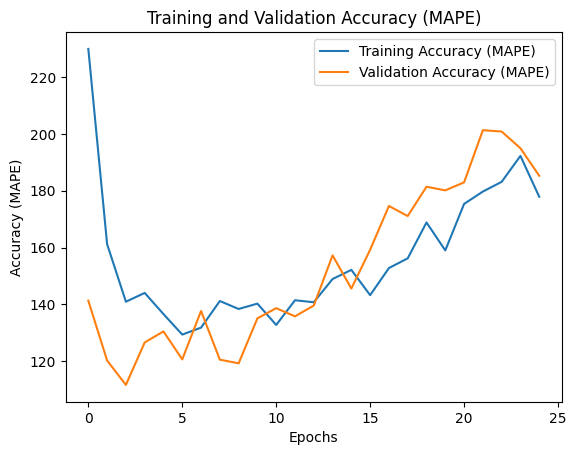

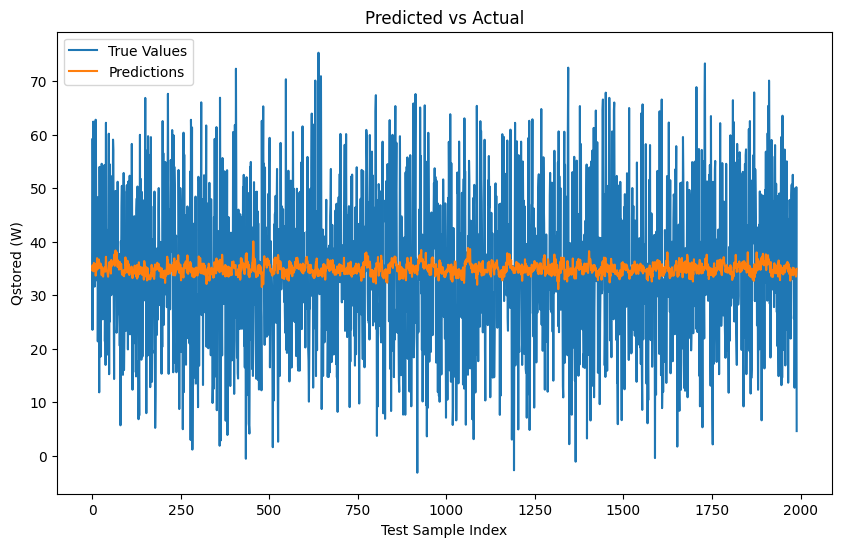

In [20]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt

# Load and prepare the dataset
data = pd.read_csv('spacecraft_thermal_data.csv')

# Select features and target
features = data[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)']].values
target = data['Qstored (W)'].values.reshape(-1, 1)

# Scaling features and target using StandardScaler
scaler_features = StandardScaler()
scaler_target = StandardScaler()

features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target)

# Set sequence length for CNN
sequence_length = 50  

# Prepare sequences for CNN
X, y = [], []
for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i + sequence_length])
    y.append(target_scaled[i + sequence_length])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define enhanced CNN model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Conv1D(128, kernel_size=3, activation='tanh'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    
    Conv1D(256, kernel_size=3, activation='sigmoid'), 
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model with a refined learning rate and loss metrics
optimizer = Adam(learning_rate=0.00025)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

# Implement Early Stopping and Learning Rate Reduction on Plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=350, batch_size=12, validation_split=0.2, verbose=1, callbacks=[early_stopping, reduce_lr])

# Predict on test set
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_test_inv = scaler_target.inverse_transform(y_test)
y_pred_inv = scaler_target.inverse_transform(y_pred_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

# Calculate Regression Accuracy within 10% tolerance
accuracy_within_10pct = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv) <= 0.1) * 100

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Regression Accuracy within 10% tolerance: {accuracy_within_10pct:.2f}%")

# Plot training and validation accuracy (mean absolute percentage error) for visibility
plt.plot(history.history['mean_absolute_percentage_error'], label='Training Accuracy (MAPE)')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation Accuracy (MAPE)')
plt.title('Training and Validation Accuracy (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (MAPE)')
plt.legend()
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_pred_inv, label='Predictions')
plt.title('Predicted vs Actual')
plt.xlabel('Test Sample Index')
plt.ylabel('Qstored (W)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load data
data = pd.read_csv('spacecraft_thermal_data.csv')
X = data[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)']]
y = data['Qstored (W)']

# Reshape data for RNN input (samples, timesteps, features)
# Here, we assume each row is a separate sample with one timestep
X_reshaped = np.expand_dims(X.values, axis=1)  # Shape: (samples, timesteps, features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model with mean squared error loss and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Predict on test data
y_pred = model.predict(X_test).flatten()  # Flatten to match y_test shape

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate Regression Accuracy within 10% tolerance
accuracy_within_10pct = np.mean(np.abs((y_test - y_pred) / y_test) <= 0.1) * 100

# Display metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Example prediction for control
example_input = np.array([[16, 60, 25, 20]])  # Hypothetical values
example_input_reshaped = np.expand_dims(example_input, axis=1)  # Shape should be (1, timesteps, features) for RNN
predicted_qstored = model.predict(example_input_reshaped)
print("Predicted Qstored for example input:", predicted_qstored)

accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

Epoch 1/100


C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 597.9807 - mae: 19.3281 - val_loss: 151.9732 - val_mae: 10.3704
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 158.7815 - mae: 10.6827 - val_loss: 165.6271 - val_mae: 10.7170
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 155.3127 - mae: 10.6276 - val_loss: 139.1796 - val_mae: 10.0143
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 147.7370 - mae: 10.3997 - val_loss: 137.2762 - val_mae: 9.9532
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147.4597 - mae: 10.4391 - val_loss: 135.9656 - val_mae: 9.9165
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 146.5930 - mae: 10.4120 - val_loss: 134.9363 - val_mae: 9.9013
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 144.7531 - mae: 10.3461 - val_loss: 132.5364 - val_mae: 9.8187
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 142.8679 - mae: 10.2805 - val_loss: 133.8976 - val_mae: 9.8672
Epoch 9/100
400/4

In [23]:
# Anomaly Detection with Isolation Forest
from sklearn.ensemble import IsolationForest
import pandas as pd

# Load data
data = pd.read_csv('spacecraft_thermal_data.csv')
features = data[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)', 'Qout/rad (W)', 'Qstored (W)']]

# Train Isolation Forest with optimized parameters
iso_forest = IsolationForest(
    n_estimators=200,        # Number of base estimators
    max_samples='auto',      # Set to 'auto' to use the smaller of 256 or the number of samples
    contamination=0.05,      # Proportion of outliers
    random_state=42
)

# Fit model and predict anomalies
data['Anomaly'] = iso_forest.fit_predict(features)

# Calculate anomaly scores for analysis
data['Anomaly_Score'] = iso_forest.decision_function(features)

# Filter out anomalies
anomalies = data[data['Anomaly'] == -1]

# Display results
print(f"Total anomalies detected: {len(anomalies)} out of {len(data)} samples")
print(f"Percentage of anomalies: {len(anomalies) / len(data) * 100:.2f}%")
print("\nAnomalies detected:\n", anomalies[['Qgen (W)', 'Qsolar (W)', 'Qalbedo (W)', 'Qplanetshine (W)', 'Qout/rad (W)', 'Qstored (W)', 'Anomaly_Score']])


Total anomalies detected: 500 out of 10000 samples
Percentage of anomalies: 5.00%

Anomalies detected:
       Qgen (W)  Qsolar (W)  Qalbedo (W)  Qplanetshine (W)  Qout/rad (W)  \
7        19.28       68.96        17.64             12.61         61.63   
13       10.09       60.90        29.84             24.77         60.56   
49       18.53       69.95        26.04             10.73         62.01   
52       10.37       53.20        26.64             11.38         97.77   
93       19.91       69.64        17.09             10.27         85.99   
...        ...         ...          ...               ...           ...   
9912     19.86       69.26        25.10             24.57         81.98   
9915     11.62       50.16        29.20             24.11         62.93   
9921     18.85       66.53        23.55             21.21         60.05   
9952     19.49       63.69        19.82             24.66         98.92   
9959     18.97       66.88        26.76             11.87         60.95